<a href="https://colab.research.google.com/github/Atharva573/Predicting-Thermoelectric-Properties-using-Machine-Learning/blob/main/Notebooks/Seebeck%20Coefficient%20Predictions/%20Random%20Forest%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

C:\Users\sadar\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
data = pd.read_csv('seebeck and thermal - targets data - elemental - features.xlsx - Sheet1.csv')
data

,formula,temperature(K),sum_Atomic_Number,sum_Atomic_Weight,sum_Mendeleev_Number,sum_l_quantum_number,sum_Atomic_Radius,sum_Covalent_Radius,sum_Pauling_Electronegativity,sum_number_of_valence_electrons,...,sum_Boiling_Point_(K),sum_Density_(g/mL),sum_specific_heat_(J/g_K)_,sum_heat_of_fusion_(kJ/mol)_,sum_heat_of_vaporization_(kJ/mol)_,sum_thermal_conductivity_(W/(m_K))_,sum_SpaceGroupNumber,seebeck_coefficient,Thermal_conductivity,electrical_conductivity(S/m)
0,BiSb(Se0.92Br0.08)3,300,236.24,567.84693,439.44,5.0,5.8284,6.3152,11.8184,28.24,...,6780.462,30.4092,1.32672,50.91408,289.69712,33.63448,232.0,-110.0,0.63,27766.0
1,BiSb(Se0.92Br0.08)3,400,236.24,567.84693,439.44,5.0,5.8284,6.3152,11.8184,28.24,...,6780.462,30.4092,1.32672,50.91408,289.69712,33.63448,232.0,-138.0,0.57,23883.0
2,BiSb(Se0.92Br0.08)3,500,236.24,567.84693,439.44,5.0,5.8284,6.3152,11.8184,28.24,...,6780.462,30.4092,1.32672,50.91408,289.69712,33.63448,232.0,-163.0,0.53,20850.0
3,BiSb(Se0.92Br0.08)3,600,236.24,567.84693,439.44,5.0,5.8284,6.3152,11.8184,28.24,...,6780.462,30.4092,1.32672,50.91408,289.69712,33.63448,232.0,-181.0,0.51,19000.0
4,BiSb(Se0.92Br0.08)3,700,236.24,567.84693,439.44,5.0,5.8284,6.3152,11.8184,28.24,...,6780.462,30.4092,1.32672,50.91408,289.69712,33.63448,232.0,-193.0,0.50,17925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200,Ge9Sb2Te12,423,1014.00,2428.21000,1961.00,23.0,28.6700,29.9400,47.3900,118.00,...,47530.050,136.1400,5.70000,582.08000,3762.98000,615.90000,4181.0,77.0,2.86,173636.0
5201,Ge9Sb2Te12,525,1014.00,2428.21000,1961.00,23.0,28.6700,29.9400,47.3900,118.00,...,47530.050,136.1400,5.70000,582.08000,3762.98000,615.90000,4181.0,98.0,2.76,136364.0
5202,Ge9Sb2Te12,625,1014.00,2428.21000,1961.00,23.0,28.6700,29.9400,47.3900,118.00,...,47530.050,136.1400,5.70000,582.08000,3762.98000,615.90000,4181.0,113.0,2.82,120000.0
5203,Ge9Sb2Te12,725,1014.00,2428.21000,1961.00,23.0,28.6700,29.9400,47.3900,118.00,...,47530.050,136.1400,5.70000,582.08000,3762.98000,615.90000,4181.0,135.0,2.54,108182.0


In [ ]:
columns_to_exclude = ['formula','seebeck_coefficient' ,'Thermal_conductivity','electrical_conductivity(S/m)']
X = data.drop(columns=columns_to_exclude)
X

,temperature(K),sum_Atomic_Number,sum_Atomic_Weight,sum_Mendeleev_Number,sum_l_quantum_number,sum_Atomic_Radius,sum_Covalent_Radius,sum_Pauling_Electronegativity,sum_number_of_valence_electrons,sum_1st_ionization_potential_(kJ/mol),sum_Melting_point_(K),sum_Boiling_Point_(K),sum_Density_(g/mL),sum_specific_heat_(J/g_K)_,sum_heat_of_fusion_(kJ/mol)_,sum_heat_of_vaporization_(kJ/mol)_,sum_thermal_conductivity_(W/(m_K))_,sum_SpaceGroupNumber
0,300,236.24,567.84693,439.44,5.0,5.8284,6.3152,11.8184,28.24,4407.76,2864.942,6780.462,30.4092,1.32672,50.91408,289.69712,33.63448,232.0
1,400,236.24,567.84693,439.44,5.0,5.8284,6.3152,11.8184,28.24,4407.76,2864.942,6780.462,30.4092,1.32672,50.91408,289.69712,33.63448,232.0
2,500,236.24,567.84693,439.44,5.0,5.8284,6.3152,11.8184,28.24,4407.76,2864.942,6780.462,30.4092,1.32672,50.91408,289.69712,33.63448,232.0
3,600,236.24,567.84693,439.44,5.0,5.8284,6.3152,11.8184,28.24,4407.76,2864.942,6780.462,30.4092,1.32672,50.91408,289.69712,33.63448,232.0
4,700,236.24,567.84693,439.44,5.0,5.8284,6.3152,11.8184,28.24,4407.76,2864.942,6780.462,30.4092,1.32672,50.91408,289.69712,33.63448,232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200,423,1014.00,2428.21000,1961.00,23.0,28.6700,29.9400,47.3900,118.00,18954.00,21465.050,47530.050,136.1400,5.70000,582.08000,3762.98000,615.90000,4181.0
5201,525,1014.00,2428.21000,1961.00,23.0,28.6700,29.9400,47.3900,118.00,18954.00,21465.050,47530.050,136.1400,5.70000,582.08000,3762.98000,615.90000,4181.0
5202,625,1014.00,2428.21000,1961.00,23.0,28.6700,29.9400,47.3900,118.00,18954.00,21465.050,47530.050,136.1400,5.70000,582.08000,3762.98000,615.90000,4181.0
5203,725,1014.00,2428.21000,1961.00,23.0,28.6700,29.9400,47.3900,118.00,18954.00,21465.050,47530.050,136.1400,5.70000,582.08000,3762.98000,615.90000,4181.0


In [ ]:
y = data['seebeck_coefficient']
y

0      -110.0
1      -138.0
2      -163.0
3      -181.0
4      -193.0
        ...  
5200     77.0
5201     98.0
5202    113.0
5203    135.0
5204    169.0
Name: seebeck_coefficient, Length: 5205, dtype: float64

In [ ]:
X, y = shuffle(X, y, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)

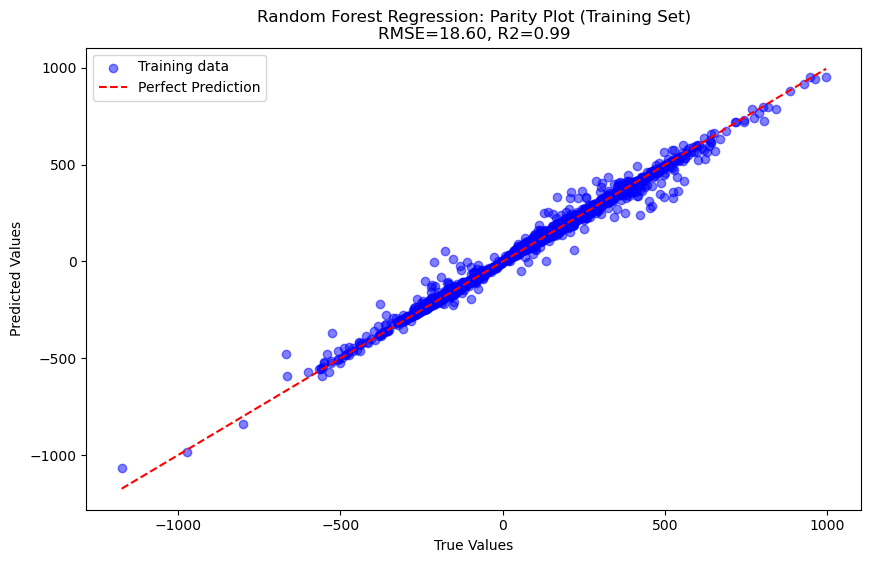

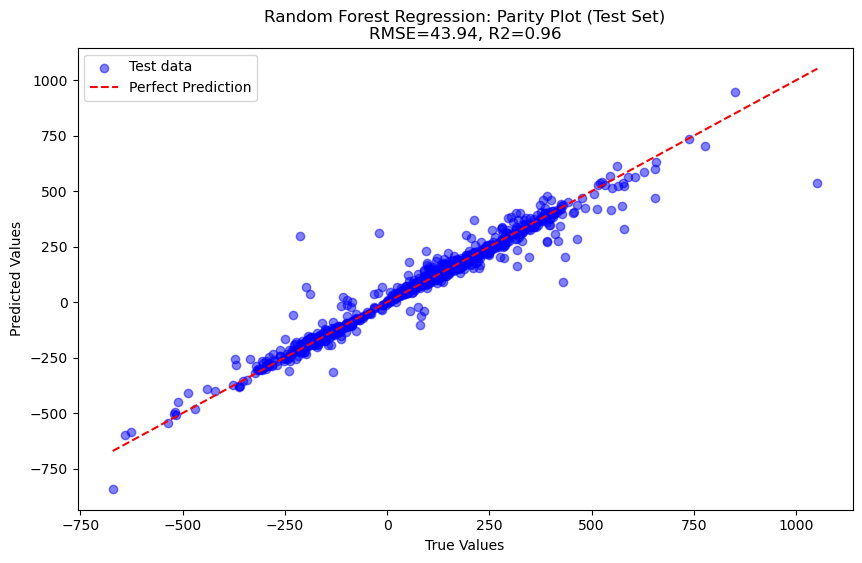

In [ ]:
# Train Random Forest model
rf = RandomForestRegressor()  # You can adjust the parameters as needed
rf.fit(X_train, y_train)

# Make predictions for both training and test sets
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Calculate RMSE and R2 score for both sets
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)

test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

# Function to plot parity plot
def plot_parity(y_true, y_pred, model_name, rmse, r2, dataset):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.5, label=f'{dataset} data')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Perfect Prediction')
    plt.title(f'{model_name}: Parity Plot ({dataset} Set)\nRMSE={rmse:.2f}, R2={r2:.2f}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot parity plot for training set
plot_parity(y_train, y_train_pred_rf, f'Random Forest Regression', train_rmse_rf, train_r2_rf, 'Training')

# Plot parity plot for test set
plot_parity(y_test, y_test_pred_rf, f'Random Forest Regression', test_rmse_rf, test_r2_rf, 'Test')


# With RFE

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

rf_model = RandomForestRegressor()

# Create the RFE model and select 5 attributes
rfe = RFE(estimator=rf_model)
rfe.fit(X, y)

# Get the selected feature indices
selected_feature_indices = rfe.get_support(indices=True)

# Fit the Random Forest model with all features
rf_model.fit(X, y)

# Get feature importance scores from the Random Forest model
feature_importances = rf_model.feature_importances_

# Print the feature importance scores of the selected features
print("Feature Importance Scores of selected features:")

selected_features = []

for idx in selected_feature_indices:
    print(X.columns[idx],' ---> ' ,{feature_importances[idx]})
    selected_features.append(X.columns[idx])

Feature Importance Scores of selected features:
sum_Covalent_Radius  --->  {0.02305380864301396}
sum_Pauling_Electronegativity  --->  {0.08720463222355199}
sum_number_of_valence_electrons  --->  {0.043405341964585835}
sum_1st_ionization_potential_(kJ/mol)  --->  {0.07719284891141462}
sum_Density_(g/mL)  --->  {0.10761591068629497}
sum_heat_of_fusion_(kJ/mol)_  --->  {0.04153188441845669}
sum_heat_of_vaporization_(kJ/mol)_  --->  {0.09644764916103518}
sum_thermal_conductivity_(W/(m_K))_  --->  {0.1341360773950605}
sum_SpaceGroupNumber  --->  {0.13805782952501724}


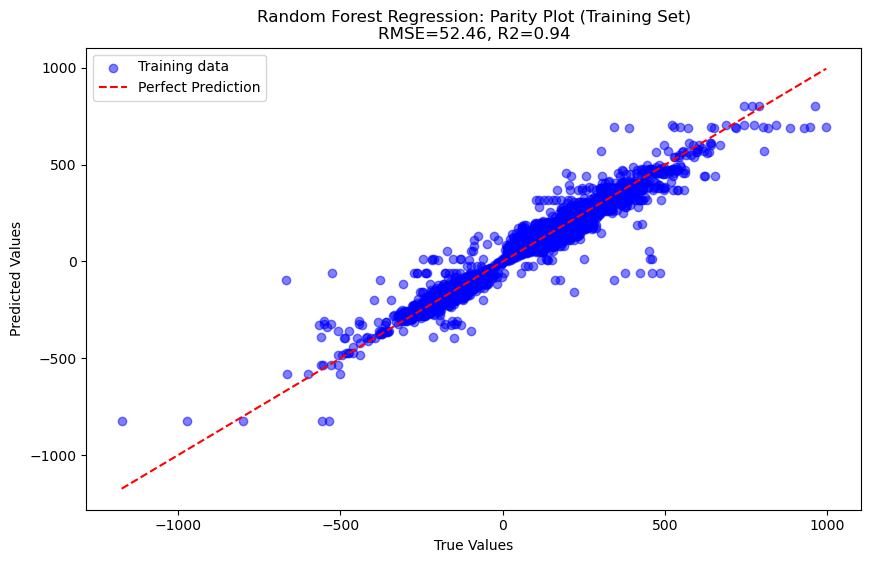

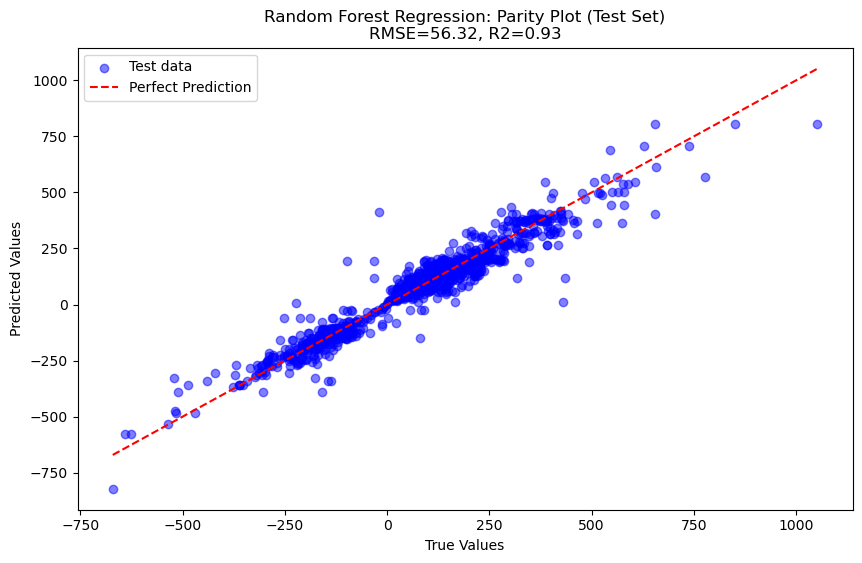

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=83)

# Train Random Forest model
rf1 = RandomForestRegressor()  # You can adjust the parameters as needed
rf1.fit(X_train, y_train)

# Make predictions for both training and test sets
y_train_pred_rf = rf1.predict(X_train)
y_test_pred_rf = rf1.predict(X_test)

# Calculate RMSE and R2 score for both sets
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)

test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

# Function to plot parity plot
def plot_parity(y_true, y_pred, model_name, rmse, r2, dataset):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.5, label=f'{dataset} data')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Perfect Prediction')
    plt.title(f'{model_name}: Parity Plot ({dataset} Set)\nRMSE={rmse:.2f}, R2={r2:.2f}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot parity plot for training set
plot_parity(y_train, y_train_pred_rf, f'Random Forest Regression', train_rmse_rf, train_r2_rf, 'Training')

# Plot parity plot for test set
plot_parity(y_test, y_test_pred_rf, f'Random Forest Regression', test_rmse_rf, test_r2_rf, 'Test')
